In [1]:
# remove.packages("WeightedTreemaps")
# devtools::install_local("/Users/hdymacuser/R_date_analysis/WeightedTreemaps", force = TRUE)

In [2]:
install.packages("nlme")
install.packages("Matrix")
install.packages("mgcv")
install.packages("ggplot2")
install.packages("tidyverse")

Warning message in install.packages("nlme"):
“パッケージ ‘nlme’ のインストールは、ゼロでない終了値をもちました”
'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了

Warning message in install.packages("Matrix"):
“パッケージ ‘Matrix’ のインストールは、ゼロでない終了値をもちました”
'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了

Warning message in install.packages("mgcv"):
“パッケージ ‘mgcv’ のインストールは、ゼロでない終了値をもちました”
'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了

'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了

'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了



In [3]:
install.packages("png")

'.Library' 中のパッケージの HTML 索引を更新します

Making 'packages.html' ...
 完了



In [4]:
# 必要なライブラリ
library(dplyr)
library(sysfonts)
library(showtext)


次のパッケージを付け加えます: ‘dplyr’


以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


Warning message:
“パッケージ ‘sysfonts’ はバージョン 4.4.3 の R の下で造られました”
Warning message:
“パッケージ ‘showtext’ はバージョン 4.4.3 の R の下で造られました”
要求されたパッケージ showtextdb をロード中です

Warning message:
“パッケージ ‘showtextdb’ はバージョン 4.4.3 の R の下で造られました”


Level 1 tesselation: 0.81 % mean error, 1.36 % max error, 100 iterations.

Level 2 tesselation: 0.27 % mean error, 0.93 % max error, 53 iterations.

Level 2 tesselation: 0.27 % mean error, 0.91 % max error, 48 iterations.

Level 2 tesselation: 0.29 % mean error, 0.92 % max error, 49 iterations.

Level 2 tesselation: 0.25 % mean error, 1 % max error, 73 iterations.

Level 2 tesselation: 0.45 % mean error, 1 % max error, 34 iterations.

Level 2 tesselation: 0.36 % mean error, 0.94 % max error, 53 iterations.

Treemap successfully created.



Debug: label_ratio_levels = 1 2 
Debug: treemap@label_ratios exists = TRUE 
Debug: label_ratios names = primary_cluster_ratio secondary_cluster_ratio 
Processing cell: LEVEL1_アニメとコラボへの期待 (Raw: アニメとコラボへの期待, Clean: アニメとコラボへの期待), Level: 1
Level 1 - Name: アニメとコラボへの期待 Matched: アニメとコラボへの期待 Ratio: 21.04 
Processing cell: LEVEL1_羽生結弦の凄さ再認識と称賛 (Raw: 羽生結弦の凄さ再認識と称賛, Clean: 羽生結弦の凄さ再認識と称賛), Level: 1
Level 1 - Name: 羽生結弦の凄さ再認識と称賛 Matched: 羽生結弦の凄さ再認識と称賛 Ratio: 21.26 
Processing cell: LEVEL1_感謝と誇りを呼び起こす瞬間 (Raw: 感謝と誇りを呼び起こす瞬間, Clean: 感謝と誇りを呼び起こす瞬間), Level: 1
Level 1 - Name: 感謝と誇りを呼び起こす瞬間 Matched: 感謝と誇りを呼び起こす瞬間 Ratio: 11.02 
Processing cell: LEVEL1_感情を揺さぶるシンプルさ (Raw: 感情を揺さぶるシンプルさ, Clean: 感情を揺さぶるシンプルさ), Level: 1
Level 1 - Name: 感情を揺さぶるシンプルさ Matched: 感情を揺さぶるシンプルさ Ratio: 15.91 
Processing cell: LEVEL1_世界を魅了するコラボへの感動 (Raw: 世界を魅了するコラボへの感動, Clean: 世界を魅了するコラボへの感動), Level: 1
Level 1 - Name: 世界を魅了するコラボへの感動 Matched: 世界を魅了するコラボへの感動 Ratio: 16.69 
Processing cell: LEVEL1_天才2人の疾走感とこだわり (Raw: 天才2人の疾走感とこだわり, Clean: 天才2

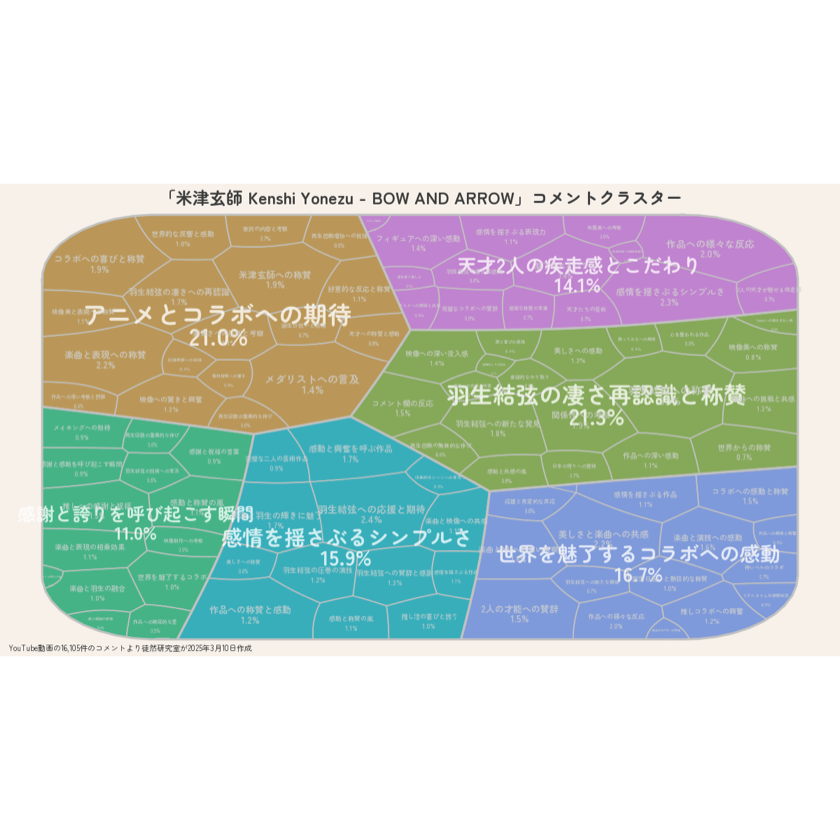

In [26]:
# 必要なライブラリを読み込む
library(WeightedTreemaps) # 重み付きツリーマップ作成用
library(dplyr)          # データ操作用
library(showtext)       # フォントを扱う用
library(grid)           # グラフィックス描画用
library(ggplot2)        # グラフ作成用
library(png)            # PNG画像の読み込み/書き出し用

# Googleフォントを追加する (Zen Maru Gothicを使用)
font_add_google("Zen Maru Gothic", "zenmaru")
# showtextによるフォントの自動使用を有効にする
showtext_auto()

# CSVファイルのパスを設定する (各自の環境に合わせて変更)
file_path <- "/Users/hdymacuser/R_date_analysis/WeightedTreemaps/data/clustered_texts_2stage (3).csv"
# CSVファイルを読み込み、データフレームdfに格納する
df <- read.csv(file_path)

# データ準備: 一次クラスタと二次クラスタを別々に集計する

# 二次クラスタごとの件数、二次クラスタの平均比率を計算
df_secondary <- df %>%
  group_by(secondary_cluster_name) %>%  # 二次クラスタ名でグループ化
  summarise(
    count = n(),                          # 各グループの件数をカウント
    secondary_cluster_ratio = mean(secondary_cluster_ratio, na.rm = TRUE), # 二次クラスタ比率の平均を計算 (欠損値は除外)
    .groups = 'drop'                      # グループ化を解除
  ) %>% filter(count > 0)                 # 件数が0より大きいもののみ抽出

# 一次クラスタごとの件数、一次クラスタの平均比率を計算
df_primary <- df %>%
  group_by(primary_cluster_name) %>%    # 一次クラスタ名でグループ化
  summarise(
    count = n(),                          # 各グループの件数をカウント
    primary_cluster_ratio = mean(primary_cluster_ratio, na.rm = TRUE), # 一次クラスタ比率の平均を計算 (欠損値は除外)
    .groups = 'drop'                      # グループ化を解除
  ) %>% filter(count > 0)                 # 件数が0より大きいもののみ抽出

# 二次クラスタと一次クラスタの組み合わせごとの件数を計算し、
# 二次クラスタ比率と一次クラスタ比率を追加する
df_counts <- df %>%
  group_by(secondary_cluster_name, primary_cluster_name) %>%  # 二次クラスタ名と一次クラスタ名でグループ化
  summarise(
    count = n(),                          # 各グループの件数をカウント
    .groups = 'drop'                      # グループ化を解除
  ) %>%
  filter(count > 0) %>%                 # 件数が0より大きいもののみ抽出
  left_join(df_secondary %>% select(secondary_cluster_name, secondary_cluster_ratio), by = "secondary_cluster_name") %>% # 二次クラスタ情報を結合
  left_join(df_primary %>% select(primary_cluster_name, primary_cluster_ratio), by = "primary_cluster_name")          # 一次クラスタ情報を結合

# Voronoi Treemap (ボロノイ図) を作成
tm <- voronoiTreemap(
  data = df_counts,                                           # ツリーマップのデータ
  levels = c("secondary_cluster_name", "primary_cluster_name"), # 階層構造を指定 (二次クラスタ -> 一次クラスタ)
  cell_size = "count",                                        # セルの大きさを決める変数 (件数)
  shape = "rounded_rect",                                     # セルの形状 (角丸四角形)
  positioning = "clustered",                                  # セルの配置方法 (クラスタ化)
  error_tol = 0.01,                                           # 許容誤差
  maxIteration = 100,                                         # 最大反復回数
  label_ratios = c("primary_cluster_ratio", "secondary_cluster_ratio"), # ラベルとして表示する比率
  verbose = TRUE                                              # 詳細なログを出力
)

# 出力画像の幅、高さ、解像度を設定
width_px <- 1200
height_px <- 675
dpi <- 300
# 出力ファイル名を指定
output_filename <- "treemap.png"

# ツリーマップを描画するgrob(グラフィカルオブジェクト)を作成
treemap_grob <- grid.grabExpr({
  grid::grid.newpage() # 新しい描画ページを作成

  # ツリーマップ用のビューポートを設定（下に移動）
  # pushViewport(viewport(y = unit(0.02, "npc"), height = unit(0.88, "npc"), just = "bottom"))
　pushViewport(viewport(y = unit(0.0, "npc"), height = unit(0.0, "npc"), just = "bottom"))
  drawTreemap(tm,
    label_level = c(1, 2),                                     # ラベルを表示する階層 (1: 二次クラスタ, 2: 一次クラスタ)
    label_color = c(adjustcolor(grey(1), alpha.f = 0.8), adjustcolor(grey(0.85), alpha.f = 0.80)), # ラベルの色
    label_size = c(0.65, 0.8),                                 # ラベルのサイズ
    label_autoscale = TRUE,                                   # ラベルの自動スケーリングを有効化
    label_fontfamily = "zenmaru",                             # ラベルのフォントファミリー
    label_fontweight = "bold",                                 # ラベルのフォントの太さ
    label_line_spacing = c(1.0, 0.0),                                # ラベルの行間
    label_ratio = c(1, 2),                                     # 比率を表示するかどうか
    label_ratio_color = c(adjustcolor(grey(1), alpha.f = 0.8), adjustcolor(grey(0.85), alpha.f = 0.80)), # ラベルの色
    label_ratio_size = 0.5,                                   # 比率のラベルのサイズ
    label_ratio_fontfamily = "zenmaru",                        # 比率のラベルのフォントファミリー
    label_ratio_fontweight = "bold",                           # 比率のラベルのフォントの太さ
    border_size = 1.0,                                         # 境界線の太さ
    border_color = grey(0.8),                                  # 境界線の色
    border_alpha = 0.6,                                       # 境界線の透明度
    color_type = "categorical",                               # 色のタイプ (カテゴリカル)
    color_level = 1,                                           # 色を適用する階層 (1: 二次クラスタ)
    title = NULL,                                              # タイトルは設定しない,
    y_offset = -0.015  # ツリーマップを下方に移動
  )
  popViewport() # ビューポートを元に戻す

  # タイトルを別途描画
  grid::grid.text(
    "「米津玄師 Kenshi Yonezu - BOW AND ARROW」コメントクラスター",
    x = unit(0.5, "npc"),
    y = unit(0.97, "npc"),
    gp = gpar(fontsize = 18, fontfamily = "zenmaru", fontface = "bold", col = grey(0.3)) # fontweight を fontface に変更
  )
}, wrap.grobs = TRUE)


# 総レビュー数を計算
total_reviews <- nrow(df)
# キャプション(説明文)のgrobを作成
caption_grob <- textGrob(
  paste0("YouTube動画の", format(total_reviews, big.mark = ","), "件のコメントより徒然研究室が2025年3月10日作成"), # キャプション文字列
  x = unit(0.01, "npc"),  # X座標 (左端)
  y = unit(0.01, "npc"), # Y座標 (下端)
  hjust = 0,             # 水平方向の配置 (左寄せ)
  vjust = 0,             # 垂直方向の配置 (下寄せ)
  gp = gpar(fontsize = 8, fontfamily = "zenmaru", fontface = "plain", col = grey(0.2)) # フォント等の設定
)

# 最終的なプロットを作成 (ggplotを使用)
final_plot <- ggplot() +
  annotation_custom(treemap_grob) +   # ツリーマップのgrobを追加
  annotation_custom(caption_grob) +  # キャプションのgrobを追加
  theme_void() +                     # 空白のテーマを使用 (軸などを非表示)
  theme(plot.background = element_rect(fill = "#F9F4EE", color = NA)) # 背景色を設定

# グラフをPNGファイルとして保存
ggsave(output_filename, final_plot, width = width_px, height = height_px, units = "px", dpi = dpi)
# 保存したPNGファイルを読み込む
img <- readPNG(output_filename)
# 読み込んだPNG画像をラスタ形式で描画
grid::grid.raster(img)

# 処理完了メッセージを表示
cat("### 処理が正常に終了しました ###\n")

Level 1 tesselation: 0.69 % mean error, 1.06 % max error, 100 iterations.

Level 2 tesselation: 0.4 % mean error, 0.94 % max error, 7 iterations.

Level 2 tesselation: 0.37 % mean error, 0.94 % max error, 3 iterations.

Level 2 tesselation: 0.44 % mean error, 0.96 % max error, 17 iterations.

Level 2 tesselation: 0.35 % mean error, 0.98 % max error, 11 iterations.

Level 2 tesselation: 0.52 % mean error, 0.98 % max error, 5 iterations.

Level 2 tesselation: 0.46 % mean error, 0.98 % max error, 29 iterations.

Treemap successfully created.



Debug: label_ratio_levels = 1 2 
Debug: treemap@label_ratios exists = TRUE 
Debug: label_ratios names = primary_cluster_ratio secondary_cluster_ratio 
Processing cell: LEVEL1_Secondary Cluster 1 (Raw: Secondary Cluster 1, Clean: Secondary Cluster 1), Level: 1
Level 1 - Name: Secondary Cluster 1 Matched: Secondary Cluster 1 Ratio: 3.38 
Processing cell: LEVEL1_Secondary Cluster 2 (Raw: Secondary Cluster 2, Clean: Secondary Cluster 2), Level: 1
Level 1 - Name: Secondary Cluster 2 Matched: Secondary Cluster 2 Ratio: 33.96 
Processing cell: LEVEL1_Secondary Cluster 3 (Raw: Secondary Cluster 3, Clean: Secondary Cluster 3), Level: 1
Level 1 - Name: Secondary Cluster 3 Matched: Secondary Cluster 3 Ratio: 21.65 
Processing cell: LEVEL1_Secondary Cluster 4 (Raw: Secondary Cluster 4, Clean: Secondary Cluster 4), Level: 1
Level 1 - Name: Secondary Cluster 4 Matched: Secondary Cluster 4 Ratio: 16.45 
Processing cell: LEVEL1_Secondary Cluster 5 (Raw: Secondary Cluster 5, Clean: Secondary Cluster 5)

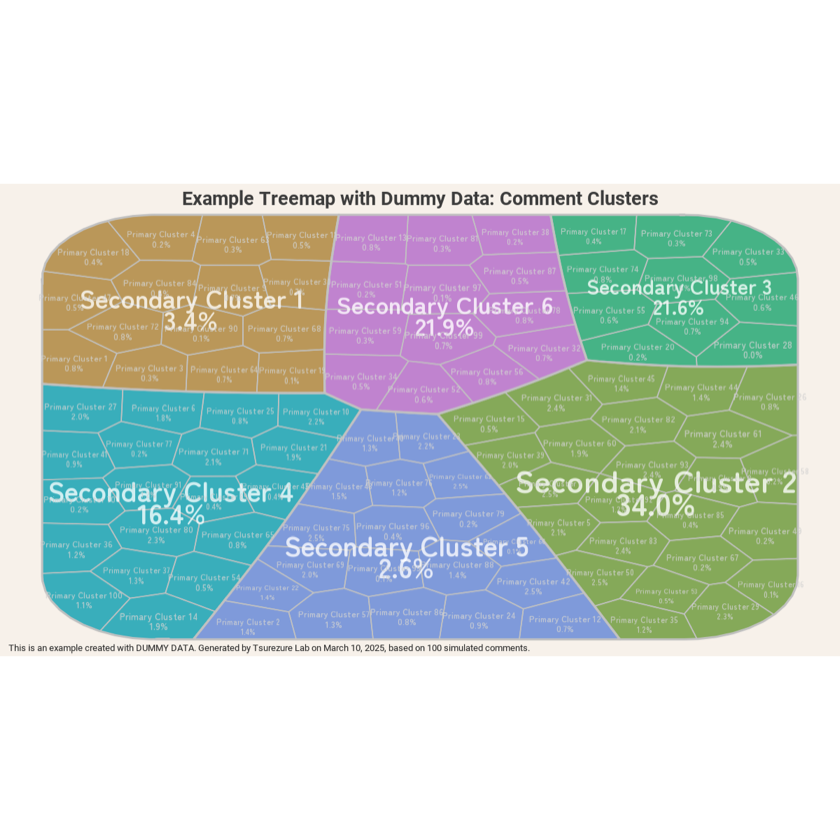

In [91]:
# 必要なライブラリを読み込む / Load necessary libraries
library(WeightedTreemaps) # 重み付きツリーマップ作成用 / For creating weighted treemaps
library(dplyr)          # データ操作用 / For data manipulation
library(showtext)       # フォントを扱う用 / For handling fonts
library(grid)           # グラフィックス描画用 / For graphics rendering
library(ggplot2)        # グラフ作成用 / For creating plots
library(png)            # PNG画像の読み込み/書き出し用 / For reading/writing PNG images

# Googleフォントを追加 / Add Google Fonts
font_add_google("Zen Maru Gothic", "zenmaru") # 日本語フォント / Japanese font
font_add_google("Roboto", "roboto")          # 英語フォント (例) / English font (example)
showtext_auto() # showtextによるフォントの自動使用を有効にする / Enable automatic font usage with showtext

# ダミーデータ生成関数 / Dummy data generation function
generate_dummy_data <- function() {
  set.seed(42) # 結果の再現性のため / For reproducibility of results

  # primary_cluster (合計100種類) / primary_cluster (100 total)
  num_primary_clusters <- 100
  primary_cluster_names <- paste("Primary Cluster", 1:num_primary_clusters)
  primary_cluster_ids <- 1:num_primary_clusters

  # secondary_cluster (6種類) / secondary_cluster (6 total)
  num_secondary_clusters <- 6
  secondary_cluster_names <- paste("Secondary Cluster", 1:num_secondary_clusters)
  secondary_cluster_ids <- 1:num_secondary_clusters

  # 各primary_clusterがどのsecondary_clusterに属するかをランダムに決定 / Randomly assign each primary_cluster to a secondary_cluster
  primary_to_secondary <- sample(secondary_cluster_ids, num_primary_clusters, replace = TRUE)

  # データフレームの初期化 / Initialize data frame
  df <- data.frame(
    primary_cluster = integer(),
    primary_cluster_name = character(),
    primary_cluster_ratio = numeric(),
    secondary_cluster = integer(),
    secondary_cluster_name = character(),
    secondary_cluster_ratio = numeric(),
    stringsAsFactors = FALSE
  )

  # primary cluster ratio のためのデータ数 / Number of data points for primary cluster ratio
  num_data_per_primary <- sample(1:30, num_primary_clusters, replace = TRUE)
  total_data_count <- sum(num_data_per_primary)

  # secondary_cluster_ratioを先に決定 (合計が100になるように) / Determine secondary_cluster_ratio beforehand (to sum up to 100)
  sec_ratios <- runif(num_secondary_clusters)
  sec_ratios <- round(sec_ratios / sum(sec_ratios) * 100, 2)

  # 各プライマリクラスタに対してループ / Loop through each primary cluster
  for (i in 1:num_primary_clusters) {
    # primary clusterの情報 / primary cluster information
    p_id <- primary_cluster_ids[i]
    p_name <- primary_cluster_names[i]
    p_ratio <- round(num_data_per_primary[i] / total_data_count * 100, 2)

    # このprimary clusterが属するsecondary cluster / The secondary cluster this primary cluster belongs to
    sec_cluster <- primary_to_secondary[i]
    sec_cluster_name <- secondary_cluster_names[sec_cluster]

    # secondary_cluster_ratio を取得 / Get secondary_cluster_ratio
    s_ratio <- sec_ratios[sec_cluster]

    # データフレームに追加 / Add to data frame
    temp_df <- data.frame(
      primary_cluster = p_id,
      primary_cluster_name = p_name,
      primary_cluster_ratio = p_ratio,
      secondary_cluster = sec_cluster,
      secondary_cluster_name = sec_cluster_name,
      secondary_cluster_ratio = s_ratio,
      stringsAsFactors = FALSE
    )
    df <- rbind(df, temp_df)
  }

  # primary_cluster_ratioを調整（偏りと合計100）/ Adjust primary_cluster_ratio (bias and sum to 100)
  df <- df %>%
    group_by(secondary_cluster) %>%
    mutate(row_count = n()) %>%
    ungroup() %>%
    mutate(primary_cluster_ratio = ifelse(row_count > mean(row_count), primary_cluster_ratio * 1.5, primary_cluster_ratio * 0.5)) %>%
    select(-row_count) %>%
    ungroup() %>%
    mutate(primary_cluster_ratio = round(primary_cluster_ratio / sum(primary_cluster_ratio) * 100, 2))


  return(df)
}
# ダミーデータを生成 / Generate dummy data
df <- generate_dummy_data()

# データ準備: 一次クラスタと二次クラスタを別々に集計する / Data preparation: Aggregate primary and secondary clusters separately

# 二次クラスタごとの件数、二次クラスタの比率を計算 / Calculate the number of cases and ratio for each secondary cluster
df_secondary <- df %>%
  group_by(secondary_cluster_name) %>%  # 二次クラスタ名でグループ化 / Group by secondary cluster name
  summarise(
    count = n(),                        # 各グループの件数をカウント / Count the number of cases in each group
    secondary_cluster_ratio = first(secondary_cluster_ratio),  # first() を使用 / Use first()
    .groups = 'drop'                      # グループ化を解除 / Ungroup
  ) %>% filter(count > 0)                 # 件数が0より大きいもののみ抽出 / Filter out clusters with 0 count

# 一次クラスタごとの件数、一次クラスタの比率を計算 / Calculate the number of cases and ratio for each primary cluster
df_primary <- df %>%
  group_by(primary_cluster_name) %>%    # 一次クラスタ名でグループ化 / Group by primary cluster name
  summarise(
    count = n(),                          # 各グループの件数をカウント / Count the number of cases in each group
    primary_cluster_ratio = mean(primary_cluster_ratio, na.rm = TRUE), # 一次クラスタ比率の平均を計算 (欠損値は除外) / Calculate the mean of primary cluster ratios (excluding missing values)
    .groups = 'drop'                      # グループ化を解除 / Ungroup
  ) %>% filter(count > 0)                 # 件数が0より大きいもののみ抽出 / Filter out clusters with 0 count

# 二次クラスタと一次クラスタの組み合わせごとの件数を計算し、 / Calculate the number of cases for each combination of secondary and primary clusters,
# 二次クラスタ比率と一次クラスタ比率を追加する / and add secondary and primary cluster ratios
df_counts <- df %>%
  group_by(secondary_cluster_name, primary_cluster_name) %>%  # 二次クラスタ名と一次クラスタ名でグループ化 / Group by secondary and primary cluster names
  summarise(
    count = n(),                          # 各グループの件数をカウント / Count the number of cases in each group
    .groups = 'drop'                      # グループ化を解除 / Ungroup
  ) %>%
  filter(count > 0) %>%                 # 件数が0より大きいもののみ抽出 / Filter out combinations with 0 count
  left_join(df_secondary %>% select(secondary_cluster_name, secondary_cluster_ratio), by = "secondary_cluster_name") %>% # 二次クラスタ情報を結合 / Join secondary cluster information
  left_join(df_primary %>% select(primary_cluster_name, primary_cluster_ratio), by = "primary_cluster_name")          # 一次クラスタ情報を結合 / Join primary cluster information

# Voronoi Treemap (ボロノイ図) を作成 / Create Voronoi Treemap
tm <- voronoiTreemap(
  data = df_counts,                                           # ツリーマップのデータ / Data for the treemap
  levels = c("secondary_cluster_name", "primary_cluster_name"), # 階層構造を指定 (二次クラスタ -> 一次クラスタ) / Specify hierarchical structure (secondary cluster -> primary cluster)
  cell_size = "count",                                        # セルの大きさを決める変数 (件数) / Variable determining cell size (count)
  shape = "rounded_rect",                                     # セルの形状 (角丸四角形) / Cell shape (rounded rectangle)
  positioning = "clustered",                                  # セルの配置方法 (クラスタ化) / Cell arrangement method (clustered)
  error_tol = 0.01,                                           # 許容誤差 / Tolerance for error
  maxIteration = 100,                                         # 最大反復回数 / Maximum number of iterations
  label_ratios = c("primary_cluster_ratio", "secondary_cluster_ratio"), # ラベルとして表示する比率 / Ratios to display as labels
  verbose = TRUE                                              # 詳細なログを出力 / Output detailed logs
)

# 出力画像の幅、高さ、解像度を設定 / Set width, height, and resolution of the output image
width_px <- 1200
height_px <- 675
dpi <- 300
# 出力ファイル名を指定 / Specify output file name
output_filename <- "treemap.png"

# ツリーマップを描画するgrob(グラフィカルオブジェクト)を作成 / Create a grob (graphical object) to draw the treemap
treemap_grob <- grid.grabExpr({
  grid::grid.newpage() # 新しい描画ページを作成 / Create a new drawing page

  # ツリーマップ用のビューポートを設定 / Set viewport for treemap
  pushViewport(viewport(y = unit(0.0, "npc"), height = unit(0.0, "npc"), just = "bottom"))
  drawTreemap(tm,
              label_level = c(1, 2),                                     # ラベルを表示する階層 (1: 二次クラスタ, 2: 一次クラスタ) / Hierarchies to display labels (1: secondary cluster, 2: primary cluster)
              label_color = c(adjustcolor(grey(1), alpha.f = 0.8), adjustcolor(grey(0.85), alpha.f = 0.80)), # ラベルの色 / Label colors
              label_size = c(0.8, 1.0),  # ラベルサイズを少し大きく / Slightly increase label size
              label_autoscale = TRUE,                                   # ラベルの自動スケーリングを有効化 / Enable automatic label scaling
              label_fontfamily = "zenmaru",                             # ラベルのフォントファミリー / Label font family
              label_fontweight = "bold",                                 # ラベルのフォントの太さ / Label font weight
              label_line_spacing = c(1.0, 0.0),                         # ラベルの行間 / Label line spacing
              label_ratio = c(1, 2),                                     # 比率を表示するかどうか / Whether to display ratios
              label_ratio_color = c(adjustcolor(grey(1), alpha.f = 0.8), adjustcolor(grey(0.85), alpha.f = 0.80)), # ラベルの色 / Label ratio colors
              label_ratio_size = 0.6,   # 比率のラベルも少し大きく / Slightly increase ratio label size
              label_ratio_fontfamily = "zenmaru",                        # 比率のラベルのフォントファミリー / Ratio label font family
              label_ratio_fontweight = "bold",                           # 比率のラベルのフォントの太さ / Ratio label font weight
              border_size = 1.0,                                         # 境界線の太さ / Border size
              border_color = grey(0.8),                                  # 境界線の色 / Border color
              border_alpha = 0.6,                                       # 境界線の透明度 / Border transparency
              color_type = "categorical",                               # 色のタイプ (カテゴリカル) / Color type (categorical)
              color_level = 1,                                           # 色を適用する階層 (1: 二次クラスタ) / Hierarchy to apply color (1: secondary cluster)
              title = NULL,                                              # タイトルは設定しない / Do not set title
              y_offset = -0.015                                          # ツリーマップを下方に移動 / Move treemap downwards
  )
  popViewport() # ビューポートを元に戻す / Restore viewport

  # タイトル (英語, ダミーデータと明記) / Title (English, clearly indicating dummy data)
  grid::grid.text(
    "Example Treemap with Dummy Data: Comment Clusters",
    x = unit(0.5, "npc"),
    y = unit(0.97, "npc"),
    gp = gpar(fontsize = 20, fontfamily = "roboto", fontface = "bold", col = grey(0.3)) # 英語フォント / English font
  )
}, wrap.grobs = TRUE)


# 総レビュー数を計算 / Calculate the total number of reviews
total_reviews <- nrow(df)
# キャプション (英語, ダミーデータと明記) / Caption (English, clearly indicating dummy data)
caption_grob <- textGrob(
  paste0("This is an example created with DUMMY DATA. Generated by Tsurezure Lab on March 10, 2025, based on ", format(total_reviews, big.mark = ","), " simulated comments."),
  x = unit(0.01, "npc"),
  y = unit(0.01, "npc"),
  hjust = 0,
  vjust = 0,
  gp = gpar(fontsize = 10, fontfamily = "roboto", fontface = "plain", col = grey(0.2))  # 英語フォント, サイズ調整 / English font, size adjustment
)

# 最終的なプロットを作成 / Create final plot
final_plot <- ggplot() +
  annotation_custom(treemap_grob) +   # ツリーマップのgrobを追加 / Add treemap grob
  annotation_custom(caption_grob) +  # キャプションのgrobを追加 / Add caption grob
  theme_void() +                     # 空白のテーマを使用 (軸などを非表示) / Use a blank theme (hide axes, etc.)
  theme(plot.background = element_rect(fill = "#F9F4EE", color = NA)) # 背景色を設定 / Set background color

# グラフを保存 / Save the plot
ggsave(output_filename, final_plot, width = width_px, height = height_px, units = "px", dpi = dpi)
img <- readPNG(output_filename)
grid::grid.raster(img)

cat("### 処理が正常に終了しました ###\n") # / Process completed successfully
cat("### Process completed successfully ###\n")